### Import Packages


In [1]:
import torch
import numpy as np
import time
from scipy.ndimage import distance_transform_edt as distance
from scipy.ndimage import _nd_image

In [2]:
device = torch.device("cuda:0")
print(device)

cuda:0


## Benchmarks

In [3]:
dt_mean = []
dt_std = []
	
dt_GPU_mean = []
dt_GPU_std = []

dt_times = []
dt_GPU_times = []

In [4]:
for n in range(2,1000,100):
  # Euclidean Distance CPU
  temp_dt_time = []
  for i in range(100): #Samples
    a = []
    for j in range(10): #Evaluations
      x1 = torch.randint(0,2,(n,n))
      times1 = time.time()
      tfm1 = torch.from_numpy(distance(x1))
      a.append(time.time()-times1)
    temp_dt_time.append(torch.mean(torch.FloatTensor(a)))
  dt_times.append(temp_dt_time)


for n in range(2,1000,100):
  # Euclidean Distance GPU
  temp_dt_GPU_time = []
  for i in range(100): #Samples
    b = []
    for j in range(10): #Evaluations
      x2 = torch.randint(0,2,(n,n)).to(device)
      times2 = time.time()
      tfm2 = torch.from_numpy(distance(x2.cpu().numpy())).to(device)  
      b.append(time.time()-times2)
    temp_dt_GPU_time.append(torch.mean(torch.FloatTensor(b)))
  dt_GPU_times.append(temp_dt_GPU_time)


In [5]:
for i in dt_times:
  dt_mean.append(torch.mean(torch.FloatTensor(i)).numpy().tolist())
  dt_std.append(torch.std(torch.FloatTensor(i), unbiased = False).numpy().tolist())

In [6]:
for i in dt_GPU_times:
  dt_GPU_mean.append(torch.mean(torch.FloatTensor(i)).numpy().tolist())
  dt_GPU_std.append(torch.std(torch.FloatTensor(i), unbiased = False).numpy().tolist())

## Save

In [7]:
import pandas as pd

In [8]:
dt_mean = np.array(dt_mean)
dt_GPU_mean = np.array(dt_GPU_mean)
dt_std = np.array(dt_std)
dt_GPU_std = np.array(dt_GPU_std)

In [9]:
data = {'dt_mean_cpu_purePython': dt_mean, 'dt_std_cpu_purePython': dt_std, 'dt_mean_gpu_purePython': dt_GPU_mean, 'dt_std_gpu_purePython': dt_GPU_std }

In [10]:
dataframe = pd.DataFrame(data)

In [11]:
dataframe.to_csv("G:\molloi-lab\project-distance-transforms\performance\purePython_DT_ver2.csv")

In [12]:
dataframe

,dt_mean_cpu_purePython,dt_std_cpu_purePython,dt_mean_gpu_purePython,dt_std_gpu_purePython
0,0.000025,0.000043,0.000081,0.000056
1,0.000613,0.000082,0.000699,0.000085
2,0.002293,0.000107,0.002448,0.000112
3,0.005246,0.000202,0.005681,0.000128
4,0.010347,0.000187,0.011345,0.000235
5,0.015967,0.000232,0.017044,0.000244
6,0.023241,0.000251,0.024287,0.000198
7,0.031296,0.000205,0.032996,0.000195
8,0.041168,0.000202,0.043709,0.000413
9,0.052543,0.000438,0.055019,0.000230


In [13]:
x = [i for i in range(1, 1000, 100)]

In [14]:
import matplotlib.pyplot as plt

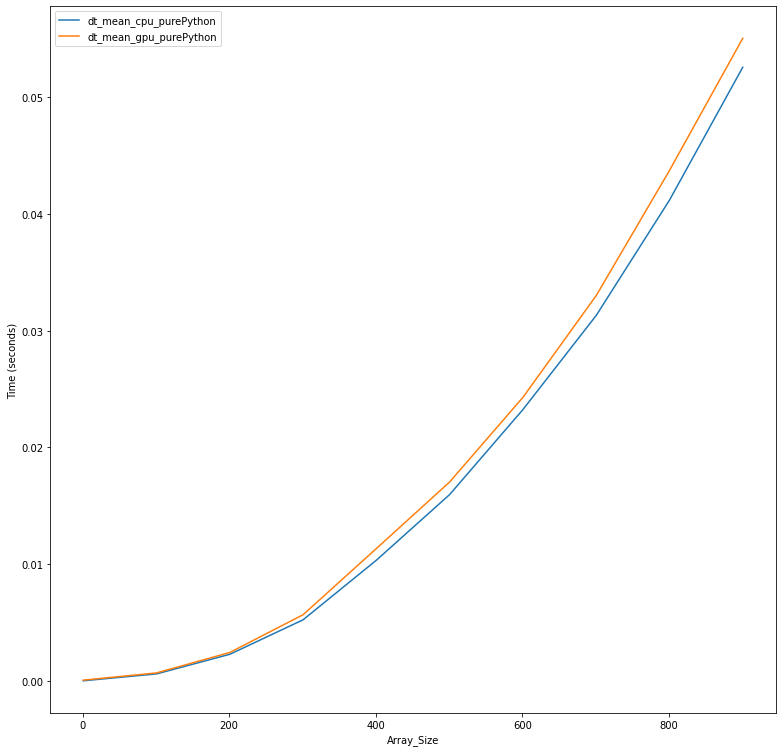

In [16]:
plt.figure(figsize=(13, 13))
plt.plot(x, dataframe['dt_mean_cpu_purePython'], label = 'dt_mean_cpu_purePython')
plt.plot(x, dataframe['dt_mean_gpu_purePython'], label = 'dt_mean_gpu_purePython')
plt.xlabel('Array_Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()